In [1]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
import numpy as np
import pandas as pd
import re
from konlpy.tag import Okt
from tqdm import tqdm

In [3]:
data = pd.read_table('ratings.txt')

In [4]:
data['document'].nunique()

194543

In [5]:
# 중복 제거
data.drop_duplicates(subset=['document'], inplace=True)

In [6]:
len(data)

194544

<AxesSubplot:>

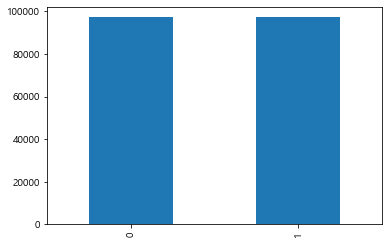

In [7]:
data['label'].value_counts().plot(kind='bar')

In [8]:
data.groupby('label').size().reset_index(name='count')

,label,count
0,0,97277
1,1,97267


In [9]:
data.isnull().values.any()

True

In [10]:
data.isnull().sum()

id          0
document    1
label       0
dtype: int64

In [11]:
data.loc[data.document.isnull()]

,id,document,label
46471,6369843,NaN,1


In [12]:
data.dropna(inplace=True)

In [13]:
data.isnull().sum()

id          0
document    0
label       0
dtype: int64

In [14]:
len(data)

194543

In [15]:
data['document'] = data['document'].str.replace('[^ㄱ-하-ㅣ가힣]',' ')

C:\Users\USER2\AppData\Local\Temp\ipykernel_11724\1238477456.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['document'] = data['document'].str.replace('[^ㄱ-하-ㅣ가힣]',' ')


In [16]:
data

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,디자인을 배우는 생으로 외국디자이너와 그들이 일군 전통을 통 발전 가는 문 산...,1
2,4655635,폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고,1
3,9251303,와 연기가 진짜 개쩔구나 지루 거라고 생각 는데 몰입 서 봤다 그래 이런...,1
4,10067386,안개 자욱 밤하늘에 떠 있는 초승달 같은 영,1
...,...,...,...
199995,8963373,포켓 몬스터 짜가 ㅡㅡ,0
199996,3302770,쓰 레 기,0
199997,5458175,완전 사이코영 마지막은 더욱더 이 영 의질을 떨어트린다,0
199998,6908648,왜난 재미없었지 ㅠㅠ 라따뚜이 보고나서 스머프 봐서 그런가 ㅋㅋ,0


In [17]:
data

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,디자인을 배우는 생으로 외국디자이너와 그들이 일군 전통을 통 발전 가는 문 산...,1
2,4655635,폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고,1
3,9251303,와 연기가 진짜 개쩔구나 지루 거라고 생각 는데 몰입 서 봤다 그래 이런...,1
4,10067386,안개 자욱 밤하늘에 떠 있는 초승달 같은 영,1
...,...,...,...
199995,8963373,포켓 몬스터 짜가 ㅡㅡ,0
199996,3302770,쓰 레 기,0
199997,5458175,완전 사이코영 마지막은 더욱더 이 영 의질을 떨어트린다,0
199998,6908648,왜난 재미없었지 ㅠㅠ 라따뚜이 보고나서 스머프 봐서 그런가 ㅋㅋ,0


In [18]:
data.isnull().values.any()

False

In [19]:
data['document'].replace('', np.nan, inplace=True)

In [20]:
data.isnull().sum()

id          0
document    0
label       0
dtype: int64

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data.document, data.label,
                                                   random_state=1234)

In [22]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로',
             '자','에','와','한','하다']

In [23]:
okt = Okt()

In [24]:
okt.morphs('오늘 날씨가 추워서 기분이 좋지않다', stem=True)

['오늘', '날씨', '가', '춥다', '기분', '이', '좋다', '않다']

In [25]:
x_train = x_train[:10000]
x_test = x_test[:10000]
y_train = y_train[:10000]
y_test = y_test[:10000]

In [26]:
train_x = []

for s in tqdm(x_train):
    temp_x = []
    temp_x = okt.morphs(s, stem=True)
    temp_x = [word for word in temp_x if not word in stopwords]
    train_x.append(temp_x)

100%|██████████| 10000/10000 [00:12<00:00, 821.56it/s]


In [27]:
test_x = []

for s in tqdm(x_test):
    temp_x = []
    temp_x = okt.morphs(s, stem=True)
    temp_x = [word for word in temp_x if not word in stopwords]
    test_x.append(temp_x)

100%|██████████| 10000/10000 [00:12<00:00, 811.35it/s]


In [28]:
train_x[:3]

[['영', '자체', '재앙', '이다', 'ㅠㅠ'],
 ['정준영', '일박이일', '살리다', 'ㅋ'],
 ['양키',
  '놈',
  '도대체',
  '왜',
  '살인마',
  '열광하다',
  '이건',
  '뭐',
  '재미',
  '없다',
  '긴장도',
  '안되다',
  '졸라',
  '뻔',
  '서다',
  '숨',
  '만',
  '나오다']]

In [29]:
test_x[:3]

[['내', '본영', '중', '에서', '젤', '최악', '이다', '게영'],
 ['굿', '개잼', '꿀잼', '잼', '무', '추천'],
 ['인류', '멸망', '이라', '쓰다', '일', '본', '감염', '이라', '읽다', 'ㅁㅊ']]

### Word2Vec

In [30]:
from gensim.models import Word2Vec

In [31]:
w2v = Word2Vec(train_x, vector_size = 300, window=3, min_count=3)

In [32]:
word_vectors = w2v.wv

In [34]:
vocabs = word_vectors.key_to_index

In [ ]:
# !pip install gensim==3.8.3

In [35]:
word_vectors_list = [word_vectors[v] for v in vocabs]

In [36]:
print(word_vectors_list[:1])

[array([ 1.09690115e-01,  4.16074634e-01, -1.59505792e-02,  1.51701495e-01,
        2.36945078e-02, -3.64416957e-01,  2.24374384e-01,  6.74414098e-01,
        1.03500754e-01, -4.12954725e-02,  4.91467565e-02, -2.25199208e-01,
        4.91832010e-02,  4.23297174e-02, -1.86949417e-01, -1.84868366e-01,
        1.83414742e-01, -5.73954470e-02, -1.96813117e-03, -6.02886900e-02,
       -1.74276933e-01, -7.93588981e-02,  2.65420377e-01,  3.37240696e-02,
        1.58897176e-01, -3.98508310e-02, -3.73483837e-01,  6.42362386e-02,
       -1.58018291e-01, -2.26098567e-01,  8.47777277e-02, -1.19798742e-01,
       -3.29605751e-02,  1.40769929e-02, -9.66914073e-02,  1.43453300e-01,
        1.32782742e-01, -3.32686812e-01, -1.23475261e-01, -2.83320062e-02,
       -1.54413715e-01, -1.06071569e-01,  3.05120107e-02, -2.97656953e-01,
        1.43312156e-01,  3.58388186e-01,  9.45429951e-02,  1.70030415e-01,
       -1.49222821e-01,  3.19415599e-01,  1.31317854e-01,  1.47873938e-01,
       -1.47408277e-01, 

In [38]:
# 유사한 단어 뽑아봄
w2v.wv.most_similar('관객')

[('오', 0.9997957348823547),
 ('제', 0.999794602394104),
 ('라', 0.9997907280921936),
 ('살다', 0.9997889399528503),
 ('세', 0.9997885227203369),
 ('인간', 0.9997866749763489),
 ('그리고', 0.9997839331626892),
 ('지다', 0.9997835755348206),
 ('떨어지다', 0.999781608581543),
 ('우리', 0.9997814893722534)]

In [39]:
# 학습된 모델 저장
w2v.save('w2v.bin')

In [40]:
# 저장된 모델 불러오기
saved_w2v = Word2Vec.load('w2v.bin')
print(saved_w2v)

Word2Vec(vocab=3992, vector_size=300, alpha=0.025)
